## 25-06-2025

In [8]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv(r"C:\Users\91805\Downloads\IBM HR Analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
le=LabelEncoder()
le

LabelEncoder()

In [12]:
df['Attrition']=le.fit_transform(df['Attrition'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

In [17]:
x = df.drop(['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
model=RandomForestClassifier(random_state=42)

In [20]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
ac=accuracy_score(y_test,y_pred)
ac

0.8809523809523809

In [23]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.94       255\n           1       0.83      0.13      0.22        39\n\n    accuracy                           0.88       294\n   macro avg       0.86      0.56      0.58       294\nweighted avg       0.88      0.88      0.84       294\n'

In [24]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[254,   1],
       [ 34,   5]], dtype=int64)

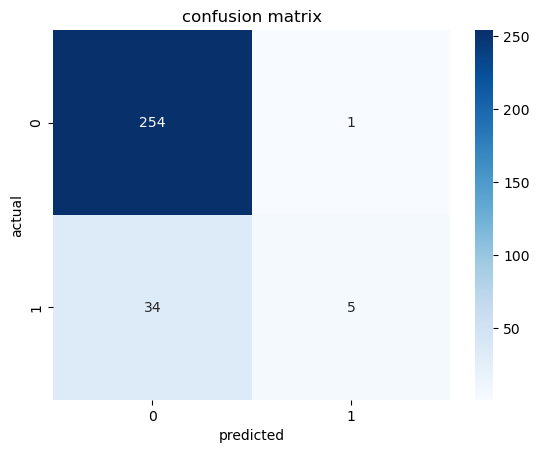

In [26]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## 26-05-2025

In [2]:
def add(a,b):
    sum=a+b
    return sum
add(2,4)

6

## 07-07-2025

In [1]:
# Question :== Build a classification model to predict whether a student pass or fails an exam based on their study hours and number of pratice tests taken

import pandas as pd
data = {
    'StudyHours': [2, 4, 5, 3, 8, 6, 1, 7, 3, 5],
    'PracticeTests': [1, 3, 4, 2, 5, 4, 1, 4, 2, 3],
    'Pass': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
}
df=pd.DataFrame(data)
df

,StudyHours,PracticeTests,Pass
0,2,1,0
1,4,3,1
2,5,4,1
3,3,2,0
4,8,5,1
5,6,4,1
6,1,1,0
7,7,4,1
8,3,2,0
9,5,3,1


In [2]:
from sklearn.model_selection import train_test_split

x=df[['StudyHours','PracticeTests']]
y=df['Pass']

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
model=DecisionTreeClassifier(random_state=42)

In [6]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1], dtype=int64)

In [9]:
acc=accuracy_score(y_test,y_pred)
acc

0.6666666666666666

In [10]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 1]], dtype=int64)

In [11]:
# Question 1: Predict if a customer buys a product (Logistic Regression)

import pandas as pd
df = pd.DataFrame({
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, 48, 33],
    'Salary': [15000, 18000, 30000, 35000, 28000, 40000, 42000, 50000, 30000, 20000],
    'Buy': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
})
df

,Age,Salary,Buy
0,22,15000,0
1,25,18000,0
2,47,30000,1
3,52,35000,1
4,46,28000,1
5,56,40000,1
6,55,42000,1
7,60,50000,1
8,48,30000,1
9,33,20000,0


In [12]:
# predict if a customer buys or not based on age and salary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
x=df[['Age','Salary']]
y=df['Buy']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model=LogisticRegression()

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(x_test)
y_pred

array([1, 0], dtype=int64)

In [18]:
ac=accuracy_score(y_test,y_pred)
ac

1.0

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 1]], dtype=int64)